In [13]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

output_df = pd.read_csv('predictions.csv')
output_df.head()
# Create binary labels from probability
output_df['Predicted_Label'] = (output_df['Churn_Probability'] > 0.5).astype(int)


Saving predictions.csv to predictions (2).csv


**Churn Probability Distribution**

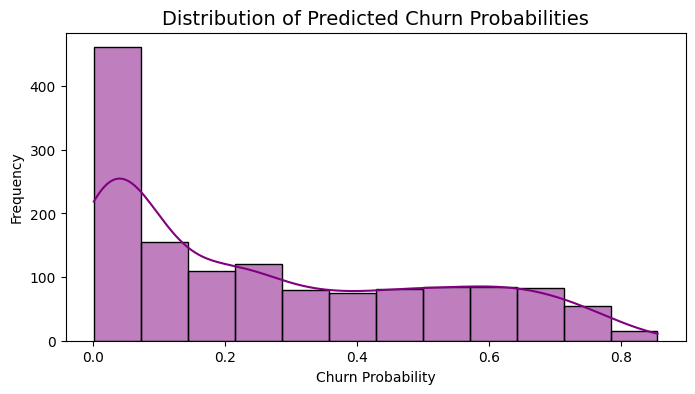

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.histplot(output_df['Churn_Probability'], kde=True, color='purple')
plt.title("Distribution of Predicted Churn Probabilities", fontsize=14)
plt.xlabel("Churn Probability")
plt.ylabel("Frequency")
plt.show()


**Churn vs Retain Pie Chart (Threshold = 0.5)**

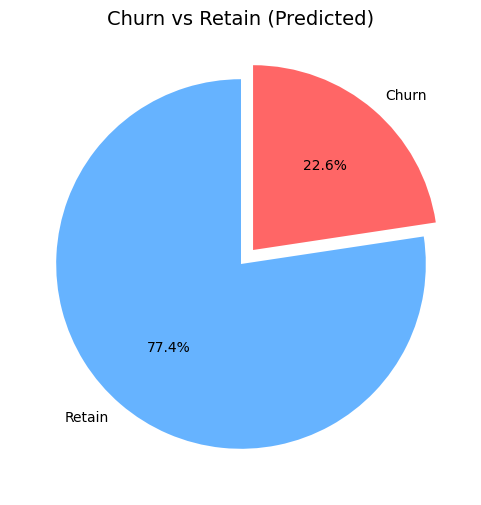

In [15]:

# Recreate counts after adding Predicted_Label
counts = output_df['Predicted_Label'].value_counts()
labels = ['Retain' if i == 0 else 'Churn' for i in counts.index]
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90,
        explode=[0.1 if i == 1 else 0 for i in counts.index])
plt.title("Churn vs Retain (Predicted)", fontsize=14)
plt.show()


**Top 10 Most At-Risk Customers**

In [16]:
# Show customers with highest predicted churn probability
top_10 = output_df.sort_values('Churn_Probability', ascending=False).head(10)
top_10.reset_index(drop=True, inplace=True)

print("Top 10 At-Risk Customers:")
top_10


Top 10 At-Risk Customers:


,CustomerID,Churn_Probability,Predicted_Label
0,5178-LMXOP,0.855050,1
1,8884-ADFVN,0.834700,1
2,1400-MMYXY,0.831596,1
3,6861-XWTWQ,0.824336,1
4,1069-XAIEM,0.815076,1
5,9057-SIHCH,0.808795,1
6,0295-PPHDO,0.807962,1
7,2545-EBUPK,0.807115,1
8,6630-UJZMY,0.800246,1
9,4750-ZRXIU,0.798784,1
